## 一、马尔科夫链

### 1. $Markov$ $Chain$

$\Rightarrow Definition: $ 

$设在一系列离散的时间点t_1,t_2,..,t_n上，状态变量X通过随机游走，所生成的状态序列为x_1,x_2,..,x_n\in S = \{s_1,s_2,..,s_m\}$

$称这个状态序列为马尔科夫链，而各个状态之间的转移关系由状态转移矩阵P所描述$

$其中P_{ij}表示状态s_i在下一个时间点转移到状态s_j的概率P(X_{n+1}=s_j|X_n=s_i)，\forall i,j\in \{1,2,..,m\}$

$\Rightarrow Properties:$

$$\begin{equation}\begin{aligned}
& ① 由转移矩阵的概念显然知：\sum\limits_{j=1}^mP_{ij} = 1，即从状态s_i出发到达所有状态的概率之和为1；\\
& ② 在任意时刻t_n，对任意状态s_i,s_j\in S，以及时刻t_n前任意可能的状态序列x_1,x_2,..,x_{n-1}，均有：\\
&\quad\quad P(X_{n+1}=s_j|X_n = s_i,X_{n-1} = x_{n-1},..,X_1 = x_1) = P(X_{n+1}=s_j|X_n = s_i) = P_{ij}\\
&\Rightarrow 即下一个时刻的状态x_{n+1}的转移仅仅依赖于此刻的状态x_n，与历史信息无关\\
& ③ 状态转移矩阵描述的是单步转移概率，而状态s_i经过k步到达状态s_j的多步状态转移概率为：\\
&\quad\quad\quad\quad\quad\quad\quad\quad P(X_{n+k}=s_j|X_n = s_i) = P^k_{i,j}\\
& ④ 每条马尔科夫链都可得到其路径概率：(其中初始概率由初始状态分布决定，与状态转移矩阵无关)\\
&\quad\quad\quad\quad\quad\quad P(X_0=s_{i_0},X_1=s_{i_1},..,X_n=s_{i_n}) = P(X_0=s_{i_0})\cdot\prod\limits_{j=1}^n P_{i_{j-1},i_{j}}\\
& ⑤ 对于一个不可约、非周期、正常返的马尔科夫链，当n\rightarrow \infty时，状态分布会收敛于一个唯一的稳态分布\pi\\
& 且每个状态的概率都大于0，该稳态分布\pi = [\pi_1,\pi_2,..,\pi_m]^T满足：\begin{cases}P^T\pi = \pi &\Rightarrow稳定性\\\textbf{1}^T\pi = 1&\Rightarrow归一性\end{cases}\\
\end{aligned}\end{equation}
$$

In [4]:
## take social state as an example for Markov Chain
import numpy as np
import pandas as pd
P = np.array([
    [0.7,0.2,0.1],
    [0.3,0.5,0.2],
    [0.2,0.4,0.4]
])
state_str = ["无产阶级","中产阶级","资产阶级"] 
social_state = pd.DataFrame(P,index=["无产阶级","中产阶级","资产阶级"],columns=["无产阶级","中产阶级","资产阶级"])
social_state

,无产阶级,中产阶级,资产阶级
无产阶级,0.7,0.2,0.1
中产阶级,0.3,0.5,0.2
资产阶级,0.2,0.4,0.4


In [56]:
## randomly walk into stable state
n = 100 # time steps
p0 = np.array([0,0,0])
p0[np.random.choice([0,1,2])] = 1 # initial state: {0,1,2} => {[1,0,0],[0,1,0],[0,0,1]}
T = np.arange(n+1) # time list
S = [np.argmax(p0)] # state list
Pn = P # the n power of P
A = P.T-np.eye(3) # the coeff matrix
b = np.array([0,0,0])

def solveHomoLinear(A,b): # to solve homogeneous linear function with infinite solutions
    eps = 1e-15
    u,s,vt = np.linalg.svd(A) # Singular Value Decomposition
    sol = np.compress(s <= eps,vt,axis=0)
    return sol

def sampleFrom(proba):
    rand = np.random.rand()
    pre = 0
    for i,p in enumerate(proba):
        if pre <= rand < pre+p:
            return i
            break
        else:
            pre += p
    return len(proba)-1

for ti in T[1:]:
    Pn = np.matmul(Pn,P) # the i power of P
    proba = np.matmul(P.T,p0) # the proba distribution of time ti
    state = sampleFrom(proba) # xi = state
    p0 = np.array([0,0,0])
    p0[state] = 1
    S.append(state)


pi = solveHomoLinear(A, b) # to solve the stable state distribution as stable condition
pi = pi/np.sum(pi) # normal condition
print("the solved stable state distribution:",pi)
print("the iterative stable state distribution:",Pn[0,:])
stable_social_state = pd.DataFrame(Pn,
                                   index=["无产阶级","中产阶级","资产阶级"],
                                   columns=["无产阶级","中产阶级","资产阶级"]
                    )
stable_social_state

the solved stable state distribution: [[0.46808511 0.34042553 0.19148936]]
the iterative stable state distribution: [0.46808511 0.34042553 0.19148936]


,无产阶级,中产阶级,资产阶级
无产阶级,0.468085,0.340426,0.191489
中产阶级,0.468085,0.340426,0.191489
资产阶级,0.468085,0.340426,0.191489


Text(0, 0.5, 'state')

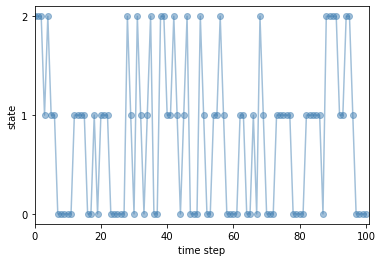

In [60]:
## show the Markov chain
import matplotlib.pyplot as plt
plt.plot(T,S,c='steelblue',marker='o',alpha=0.5)
plt.xlim(0,n+1)
plt.yticks(range(3))
plt.xlabel('time step')
plt.ylabel('state')

## 二、隐马尔科夫模型

### 1. $Hidden$ $Markov$ $Model$ 

$\Rightarrow Description: 若一个马尔科夫链的状态随机变量X不可观测，但是每个状态s_i，均对应服从某概率分布的可观测随机变量Y$

$则称该模型为隐马尔科夫模型，其中观测样本为y_1,y_2,..,y_n \in H = \{h_1,h_2,..,h_k\}$

$任一状态s_i都对应k个观测值的一个分布，形成观测概率矩阵B$

$其中B_{ij}表示在状态s_i下，观测值h_j的出现概率P(Y_n = h_j|X_n = s_i)，\forall i\in\{1,2,..,m\},j\in\{1,2,..,k\}$

$因此隐马尔科夫模型对应两个序列：\begin{cases}
状态变量X的马尔科夫链：x_1,x_2,..,x_n \in S,&不可观测\\
观测变量Y的观测链：y_1,y_2,..,y_n \in H, &可观测\\
\end{cases}$

$同时隐马尔科夫模型对应两个概率矩阵：\begin{cases}
状态之间的状态转移矩阵P：P_{ij} = P(X_{n+1} = s_j | X_n = s_i),&\forall i,j\in \{1,2,..,m\}\\
每个状态到观测值的观测概率矩阵B：B_{ij} = P(Y_n = h_j|X_n = s_i),&\forall i\in\{1,2,..,m\},j\in\{1,2,..,k\}\\
\end{cases}$

$最终，隐马尔科夫模型由三部分决定，即参数\theta = (P,B,\pi)，其中P为状态转移方程，B为观测概率矩阵，\pi为初始状态分布$

$\Rightarrow Property: 任意时刻的观测仅依赖于此刻的隐状态，与其他时刻的隐状态和观测均无关，即：$

$$
P(Y_n=h_{j_n}|X_n=s_{i_n},X_{n-1}=s_{i_{n-1}},..,X_0=s_{i_0}) = P(Y_n=h_{j_n}|X_n=s_{i_n})
$$

### 2. $Forward$ $\mathrm{DP}$ $Algorithm$ $for$ $Path$ $Probability$

$\Rightarrow Background:当一个隐马尔科夫模型确定，即其参数\theta = (P,B,\pi)均已知时，计算某观测链(y_1,y_2,..,y_n)的出现概率P(y_{1\sim n}|\theta)$

$\Rightarrow Algorithm:$

$$\begin{equation}\begin{aligned}
&① 令dp[t][i] = P(y_{1\sim t},x_t=s_i|\theta)，表示前t时刻观测序列为y_{1\sim t}且t时刻隐状态为s_i的联合概率，则由边缘概率公式：\\
&\quad\quad\quad\quad\quad\quad\quad\quad\quad  P(y_{1\sim t}|\theta) = \sum\limits_{i=1}^mP(y_{1\sim t},x_t=s_i|\theta) = \sum\limits_{i=1}^m dp[t][i]\\
&② 由①，可得dp状态转移方程：dp[t+1][i] = \sum\limits_{l=1}^m [dp[t][l]\cdot P_{li}\cdot B_{ij}] =[\sum\limits_{l=1}^m dp[t][l]\cdot P_{li}]\cdot B_{ij}，其中y_{t+1} = h_j\\
& \Rightarrow其含义为：前t+1时刻观测序列为y_{1\sim t+1}且t+1时刻隐状态为s_{i}的概率，等于前t时刻观测序列为y_{1\sim t}\\
&\quad\quad\quad\quad\quad且枚举t时刻的隐状态s_l，并由概率P_{li}转移至t+1时刻的隐状态s_{i}，再在概率B_{ij}下选中y_{t+1}的观测值h_j的全概率\\
&③ 初始状态：dp[1][i] = P(y_1=h_j,x_1=s_i|\theta) = \pi_{i}\cdot B_{ij}\\
&\Rightarrow 表示初始时刻，初始分布\pi选中隐状态s_i，又在B_{ij}下选中观测值h_j的概率
\end{aligned}\end{equation}
$$

In [67]:
## take baby's daily life as an example
import numpy as np
import pandas as pd
# init params
m = 2
k = 3
n = 5
state_str = ['饿了','困了'] # baby cannot talk, so cannont be observed
observe_str = ['大哭大闹','无精打采','爬来爬去']
P = np.array([
    [0.4,0.6],
    [0.3,0.7]
])
B = np.array([
    [0.7,0.2,0.1],
    [0.1,0.8,0.1]
])
pi = np.array([0.8,0.2]) # init time: noon time

In [68]:
# show P
state_df = pd.DataFrame(P,index=state_str,columns=state_str)
state_df

,饿了,困了
饿了,0.4,0.6
困了,0.3,0.7


In [69]:
# show B
observe_df = pd.DataFrame(B,index=state_str,columns=observe_str)
observe_df

,大哭大闹,无精打采,爬来爬去
饿了,0.7,0.2,0.1
困了,0.1,0.8,0.1


In [70]:
# show pi
pi_df = pd.Series(pi,index=state_str)
pi_df

饿了    0.8
困了    0.2
dtype: float64

In [77]:
## path proba estimation using forward dp algorithm

def forwardDP(path):
    dp = np.zeros((n,m)) # dp[t][i] = P(y1~yt,xt=si|θ), t∈{1,2,..,n}, i∈{1,2,..,m}

    # dynamic programming => O(nm^2) => O(n) (if m<<n)
    for t in range(n):
        for i in range(m):
            j = observe_str.index(path[t])
            if t == 0: # init
                dp[t][i] = pi[i] * B[i][j]
            else: # state transform
                dp[t][i] = np.sum([dp[t-1][l]*P[l][i] for l in range(m)]) * B[i][j]
    # return path probability
    return np.sum([dp[-1][i] for i in range(m)])
    
path1 = ['大哭大闹','爬来爬去','大哭大闹','无精打采','爬来爬去'] # seems not likely
path1_proba = forwardDP(path1)
print("The path probability of {}".format(path1)," : {}".format(path1_proba))

path2 = ['大哭大闹','大哭大闹','大哭大闹','无精打采','无精打采'] # seems reasonable
path2_proba = forwardDP(path2)
print("The path probability of {}".format(path2)," : {}".format(path2_proba))

path3 = ['无精打采','无精打采','无精打采','无精打采','无精打采'] # seems quite reasonable as a sleeping baby
path3_proba = forwardDP(path3)
print("The path probability of {}".format(path3)," : {}".format(path3_proba))

The path probability of ['大哭大闹', '爬来爬去', '大哭大闹', '无精打采', '爬来爬去']  : 0.0010096999999999999
The path probability of ['大哭大闹', '大哭大闹', '大哭大闹', '无精打采', '无精打采']  : 0.02256352
The path probability of ['无精打采', '无精打采', '无精打采', '无精打采', '无精打采']  : 0.04361093120000001


### 3. $Viterbi$ $\mathrm{DP}$ $Algorithm$ $for$ $State$ $Decoding$

$\Rightarrow Background:当一个隐马尔科夫模型确定，即其参数\theta = (P,B,\pi)均已知时，计算某观测链(y_1,y_2,..,y_n)最有可能对应的状态链(x_1,x_2,..,x_n)$

$即寻找某观测链下，所能对应的最大路径概率状态链: \mathrm{arg}\max\limits_{x_{1\sim n}} P(x_{1\sim n}|y_{1\sim n},\theta) = \mathrm{arg}\max\limits_{x_{1\sim n}} \cfrac{P(x_{1\sim n},y_{1\sim n}|\theta)}{P(y_{1\sim n}|\theta)} = \mathrm{arg}\max\limits_{x_{1\sim n}} P(x_{1\sim n},y_{1\sim n}|\theta)$

$\Rightarrow Algorithm:(思路完全同2的前向\mathrm{DP}，仅将“求和”改成“求最大值”)$

$$\begin{equation}\begin{aligned}
&① 令dp[t][i] = P(y_{1\sim t},x_{1\sim t-1},x_t=s_i|\theta)，表示前t时刻观测链为y_{1\sim t}、状态链为x_{1\sim t}且t时刻隐状态为s_i的联合概率\\
&\quad\quad\quad\quad\quad 则最终答案为：\{x_1,x_2,..,x_{t-1},x_t^*\}, 其中： x_t^* = \mathrm{arg}\max\limits_{i} dp[t][i]\\
&② 由①，可得dp状态转移方程：dp[t+1][i] = \max\limits_{l:1\rightarrow m} [dp[t][l]\cdot P_{li}\cdot B_{ij}] =[\max\limits_{l:1\rightarrow m} dp[t][l]\cdot P_{li}]\cdot B_{ij}，其中y_{t+1} = h_j\\
& \Rightarrow其含义为：前t+1时刻观测序列为y_{1\sim t+1}、状态链为x_{1\sim t+1}且t+1时刻隐状态为s_{i}的最大概率，\\
& \quad\quad\quad\quad\quad等于前t时刻观测序列为y_{1\sim t}、状态链为x_{1\sim t}，且枚举t时刻为隐状态s_l的最大概率，\\
& \quad\quad\quad\quad\quad并由概率P_{li}转移至t+1时刻的隐状态s_{i}，再在概率B_{ij}下选中y_{t+1}的观测值h_j的概率中的最大者\\
&③ 初始状态：dp[1][i] = P(y_1=h_j,x_1=s_i|\theta) = \pi_{i}\cdot B_{ij}\\
&\Rightarrow 表示初始时刻，初始分布\pi选中隐状态s_i，又在B_{ij}下选中观测值h_j的概率
\end{aligned}\end{equation}
$$

In [80]:
## the same example as 2: the baby daily life

## state decoding using Viterbi dp algorithm
def ViterbiDP(path):
    dp = np.zeros((n,m)) # dp[t][i] = P(y1~yt,x1~xt-1,xt=si|θ), t∈{1,2,..,n}, i∈{1,2,..,m}
    state_chain = [] # the most likely hidden state chain
    
    # dynamic programming => O(nm^2) => O(n) (if m<<n)
    for t in range(n):
        for i in range(m):
            j = observe_str.index(path[t])
            if t == 0: # init
                dp[t][i] = pi[i] * B[i][j]
            else: # state transform
                dp[t][i] = np.max([dp[t-1][l]*P[l][i] for l in range(m)]) * B[i][j]
        state_chain.append(np.argmax([dp[t][i] for i in range(m)]))
    # return the most likely hidden state chain
    return state_chain

path1 = ['大哭大闹','爬来爬去','大哭大闹','无精打采','爬来爬去'] # seems unstable state
state_chain1 = [state_str[s] for s in ViterbiDP(path1)]
print("The most likely hidden state chain of {}".format(path1)," : \n{}".format(state_chain1))

path2 = ['大哭大闹','大哭大闹','大哭大闹','无精打采','无精打采'] # seems hungry first and then sleepy
state_chain2 = [state_str[s] for s in ViterbiDP(path2)]
print("The most likely hidden state chain of {}".format(path2)," : \n{}".format(state_chain2))

path3 = ['无精打采','无精打采','无精打采','无精打采','无精打采'] # seems always sleepy
state_chain3 = [state_str[s] for s in ViterbiDP(path3)]
print("The most likely hidden state chain of {}".format(path3)," : \n{}".format(state_chain3))

The most likely hidden state chain of ['大哭大闹', '爬来爬去', '大哭大闹', '无精打采', '爬来爬去']  : 
['饿了', '困了', '饿了', '困了', '困了']
The most likely hidden state chain of ['大哭大闹', '大哭大闹', '大哭大闹', '无精打采', '无精打采']  : 
['饿了', '饿了', '饿了', '困了', '困了']
The most likely hidden state chain of ['无精打采', '无精打采', '无精打采', '无精打采', '无精打采']  : 
['饿了', '困了', '困了', '困了', '困了']
